In [21]:
## Superdense Coding

In [22]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
from numpy.random import randint

In [23]:
def create_bell_pair(qc, a, b):
    '''Creates a bell pair in qc using qubits a & b'''
    qc.h(a) # put qubit a into state |+>
    qc.cx(a, b) # CNOT with a as control and b as target

def alice_gates(qc, psi, a):
    '''psi is the qubit to be sent, a is Alice's half of Bell state '''
    qc.cx(psi, a)
    qc.h(psi)

def measure_and_send(qc, a, b):
    '''Measures qubits a & b and 'sends' the results to Bob '''
    qc.barrier()
    qc.measure(a, 0)
    qc.measure(b, 1)

def bob_gates(qc, qubit, crz, crx):
    # Here we use c_if to control our gates with a classical
    #   bit instead of a qubit
    qc.x(qubit).c_if(crx, 1) # Apply gates if the registers
    qc.z(qubit).c_if(crz, 1) #   are in state '1'

In [24]:
# Define a function that takes a QuantumCircuit (qc)
#   a qubit index (qubit) and a message string (msg)
def encode_message(qc, qubit, msg):
    if msg == '00':
        pass        # To send 00 we do nothing
    elif msg == '10':
        qc.x(qubit) # To send 10 we apply an X-gate
    elif msg == '01':
        qc.z(qubit) # To send 01 we apply a Z-gate
    elif msg == '11':
        qc.z(qubit) # To send 11, we apply a Z-gate
        qc.x(qubit) #   followed by an X-gate
    else:
        print("Invalid Message: Sending '00' ")

def decode_message(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

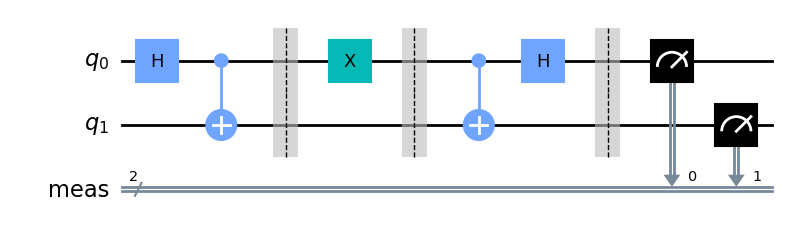

In [25]:
# Create the quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# First, create the entangled pair between Alice and Bob
create_bell_pair(qc, 0, 1)
qc.barrier()

# Next, Alice encodes her message onto qubit 0. In this case,
#   we want to send the message '10'. You can try changing this
#   value and see how it affects the circuit
message = '10'
encode_message(qc, 0, message)
qc.barrier()
# Alice then sends her qubit to Bob

# After receiving qubit 0, Bob applies the recovery protocol:
decode_message(qc, 0, 1)

# Finally, Bob measures his qubits to read Alice's message
qc.measure_all()

# Draw the output
qc.draw(output='mpl')

{'10': 1024}


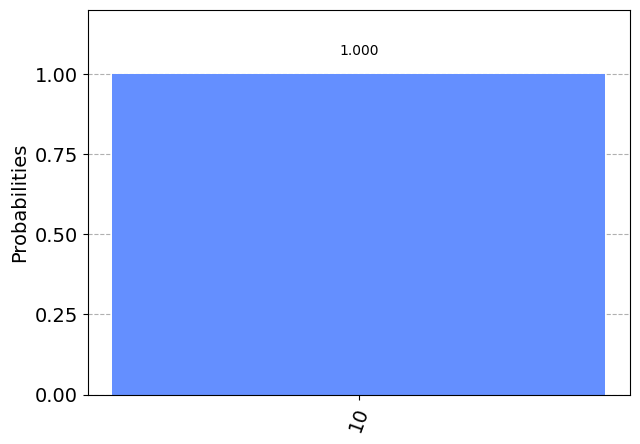

In [26]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend,  shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qc)
print(measurement_result)
plot_histogram(measurement_result)

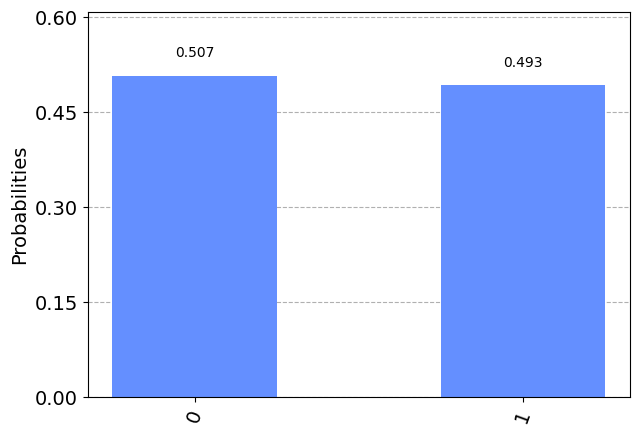

In [29]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure([0], [0])
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend).result()
plot_histogram(result.get_counts())